In [ ]:
!pip install tensorflow 

In [ ]:
!pip install keras 

In [ ]:
import pandas as pd#used for data manipulation 
import numpy as np#used for numerical analysis 
import os#operating system 
import PIL#used for dealing with images 
import seaborn as sns#data visualization 
import pickle
from PIL import *
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler
from IPython.display import display
from tensorflow.python.keras import *
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, optimizers
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import *
from tensorflow.keras import backend as K
from keras import optimizers
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow


In [ ]:
keyfacial_df = pd.read_csv('data.csv')
#last column is the actual pixel size of the images all the key points of the face are depected via the x and y coordinates  

In [ ]:
keyfacial_df
#pixel size varies between 0 to 255 0 being a complete balck image and 255 being a complete white image anything in between them is considered as a gray image 

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,right_eye_outer_corner_x,right_eye_outer_corner_y,left_eyebrow_inner_end_x,left_eyebrow_inner_end_y,left_eyebrow_outer_end_x,left_eyebrow_outer_end_y,right_eyebrow_inner_end_x,right_eyebrow_inner_end_y,right_eyebrow_outer_end_x,right_eyebrow_outer_end_y,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,23.452872,37.389402,56.953263,29.033648,80.227128,32.228138,40.227609,29.002322,16.356379,29.647471,44.420571,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774,238 236 237 238 240 240 239 241 241 243 240 23...
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,24.472511,33.144443,53.987404,28.275949,78.634213,30.405923,42.728851,26.146043,16.865362,27.058860,48.206298,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170,219 215 204 196 204 211 212 200 180 168 178 19...
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,24.976421,36.603221,55.742526,27.570947,78.887368,32.651621,42.193895,28.135453,16.791158,32.087116,47.557263,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368,144 142 159 180 188 188 184 180 167 132 84 59 ...
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,25.307270,38.007903,56.433809,30.929864,77.910261,31.665725,41.671513,31.049990,20.458017,29.909343,51.885078,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383,193 192 193 194 194 194 193 192 168 111 50 12 ...
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,22.506110,38.305237,57.249571,30.672177,77.762945,31.737247,38.035436,30.935382,15.925870,30.672177,43.299534,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166,147 148 160 196 215 214 216 217 219 220 206 18...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2135,67.180378,35.816373,33.239956,34.921932,59.347973,37.000904,72.667896,37.097600,39.404349,36.589944,24.972418,36.348203,56.402841,31.171586,80.709708,30.595738,38.187845,30.595738,17.275454,29.534964,45.805390,60.065396,64.397610,73.248393,35.446431,74.014748,48.708626,76.760852,48.559612,77.335618,191 191 191 190 189 185 184 120 54 34 19 24 31...
2136,65.724490,36.301020,25.377551,37.311224,58.530612,37.739796,74.448980,37.525510,33.551020,38.107143,15.979592,38.076531,56.941270,29.605102,81.314059,30.754762,35.059410,29.566780,8.578912,32.096032,53.649433,62.472789,66.928121,79.229046,28.015377,81.151722,48.771976,81.816774,49.287271,82.871156,19 19 19 18 13 7 3 4 3 1 3 9 11 12 12 13 10 9 ...
2137,68.430866,38.651975,28.895857,37.617027,61.659350,40.100902,75.586792,40.219182,37.665118,39.087245,21.621652,39.095524,62.388142,32.089787,85.829396,38.724104,42.595762,30.541779,11.230184,34.485512,53.318891,63.289576,68.864397,77.495823,22.013981,77.368995,49.180628,79.043130,47.176739,89.544522,31 40 47 31 54 58 63 100 86 80 82 75 79 86 90 ...
2138,64.152180,30.691592,27.000898,40.868082,56.505624,34.126963,73.436776,28.556335,34.746122,40.506939,16.850204,44.409861,51.463469,27.161327,77.354898,19.562755,34.135510,32.830102,9.731633,41.152347,54.075935,59.735799,73.730743,70.273886,38.777143,80.684286,58.042857,79.301429,58.611086,80.355543,7 1 5 1 3 20 12 0 5 8 6 18 13 9 8 12 12 11 4 8...


In [ ]:
#to get more information about the data set use the following command 
keyfacial_df.info

<bound method DataFrame.info of       left_eye_center_x  ...                                              Image
0             66.033564  ...  238 236 237 238 240 240 239 241 241 243 240 23...
1             64.332936  ...  219 215 204 196 204 211 212 200 180 168 178 19...
2             65.057053  ...  144 142 159 180 188 188 184 180 167 132 84 59 ...
3             65.225739  ...  193 192 193 194 194 194 193 192 168 111 50 12 ...
4             66.725301  ...  147 148 160 196 215 214 216 217 219 220 206 18...
...                 ...  ...                                                ...
2135          67.180378  ...  191 191 191 190 189 185 184 120 54 34 19 24 31...
2136          65.724490  ...  19 19 19 18 13 7 3 4 3 1 3 9 11 12 12 13 10 9 ...
2137          68.430866  ...  31 40 47 31 54 58 63 100 86 80 82 75 79 86 90 ...
2138          64.152180  ...  7 1 5 1 3 20 12 0 5 8 6 18 13 9 8 12 12 11 4 8...
2139          66.683755  ...  68 19 19 23 19 26 23 16 8 15 9 9 17 16 15 27 2...

[2140 r

In [ ]:
#checking if the dataset has any null values 
keyfacial_df.isnull().sum()

left_eye_center_x            0
left_eye_center_y            0
right_eye_center_x           0
right_eye_center_y           0
left_eye_inner_corner_x      0
left_eye_inner_corner_y      0
left_eye_outer_corner_x      0
left_eye_outer_corner_y      0
right_eye_inner_corner_x     0
right_eye_inner_corner_y     0
right_eye_outer_corner_x     0
right_eye_outer_corner_y     0
left_eyebrow_inner_end_x     0
left_eyebrow_inner_end_y     0
left_eyebrow_outer_end_x     0
left_eyebrow_outer_end_y     0
right_eyebrow_inner_end_x    0
right_eyebrow_inner_end_y    0
right_eyebrow_outer_end_x    0
right_eyebrow_outer_end_y    0
nose_tip_x                   0
nose_tip_y                   0
mouth_left_corner_x          0
mouth_left_corner_y          0
mouth_right_corner_x         0
mouth_right_corner_y         0
mouth_center_top_lip_x       0
mouth_center_top_lip_y       0
mouth_center_bottom_lip_x    0
mouth_center_bottom_lip_y    0
Image                        0
dtype: int64

In [ ]:
keyfacial_df['Image'].shape

(2140,)

In [ ]:
#we need to convert the image size into 96*96 pixels thus we use the lamda function 
keyfacial_df['Image'] = keyfacial_df['Image'].apply(lambda x: np.fromstring(x, dtype = int, sep = " ").reshape(96,96))

In [ ]:
keyfacial_df['Image'][0].shape

(96, 96)

In [ ]:
keyfacial_df.describe
#describes the data set 

<bound method NDFrame.describe of       left_eye_center_x  ...                                              Image
0             66.033564  ...  [[238, 236, 237, 238, 240, 240, 239, 241, 241,...
1             64.332936  ...  [[219, 215, 204, 196, 204, 211, 212, 200, 180,...
2             65.057053  ...  [[144, 142, 159, 180, 188, 188, 184, 180, 167,...
3             65.225739  ...  [[193, 192, 193, 194, 194, 194, 193, 192, 168,...
4             66.725301  ...  [[147, 148, 160, 196, 215, 214, 216, 217, 219,...
...                 ...  ...                                                ...
2135          67.180378  ...  [[191, 191, 191, 190, 189, 185, 184, 120, 54, ...
2136          65.724490  ...  [[19, 19, 19, 18, 13, 7, 3, 4, 3, 1, 3, 9, 11,...
2137          68.430866  ...  [[31, 40, 47, 31, 54, 58, 63, 100, 86, 80, 82,...
2138          64.152180  ...  [[7, 1, 5, 1, 3, 20, 12, 0, 5, 8, 6, 18, 13, 9...
2139          66.683755  ...  [[68, 19, 19, 23, 19, 26, 23, 16, 8, 15, 9, 9,...

[2140

**VISUALISING A IMAGE **

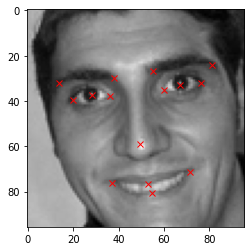

In [ ]:
#Plotting a random image from the dataset along with facial keypoints. 
#Image data is obtained from df['Image'] and plotted using plt.imshow
#15 x and y coordinates for the corresponding image is obtained by using a for loop 
#which increments from 1 to 31 by 2. For example, in the first iteration j would be 1, followed by 3 and so on.
#since x-coordinates are in even columns like 0,2,4,.. and y-coordinates are in odd columns like 1,3,5,..
#we access their value using .loc command, which get the values for coordinates of the image based on the column it is refering to.
#in the first iteration df[i][j-1] would be df[i][0] refering the value in 1st column(x-coordinate) of the image in 'i' row.

i = np.random.randint(1, len(keyfacial_df))
plt.imshow(keyfacial_df['Image'][i],cmap='gray')
for j in range(1,31,2):
        plt.plot(keyfacial_df.loc[i][j-1], keyfacial_df.loc[i][j], 'rx')


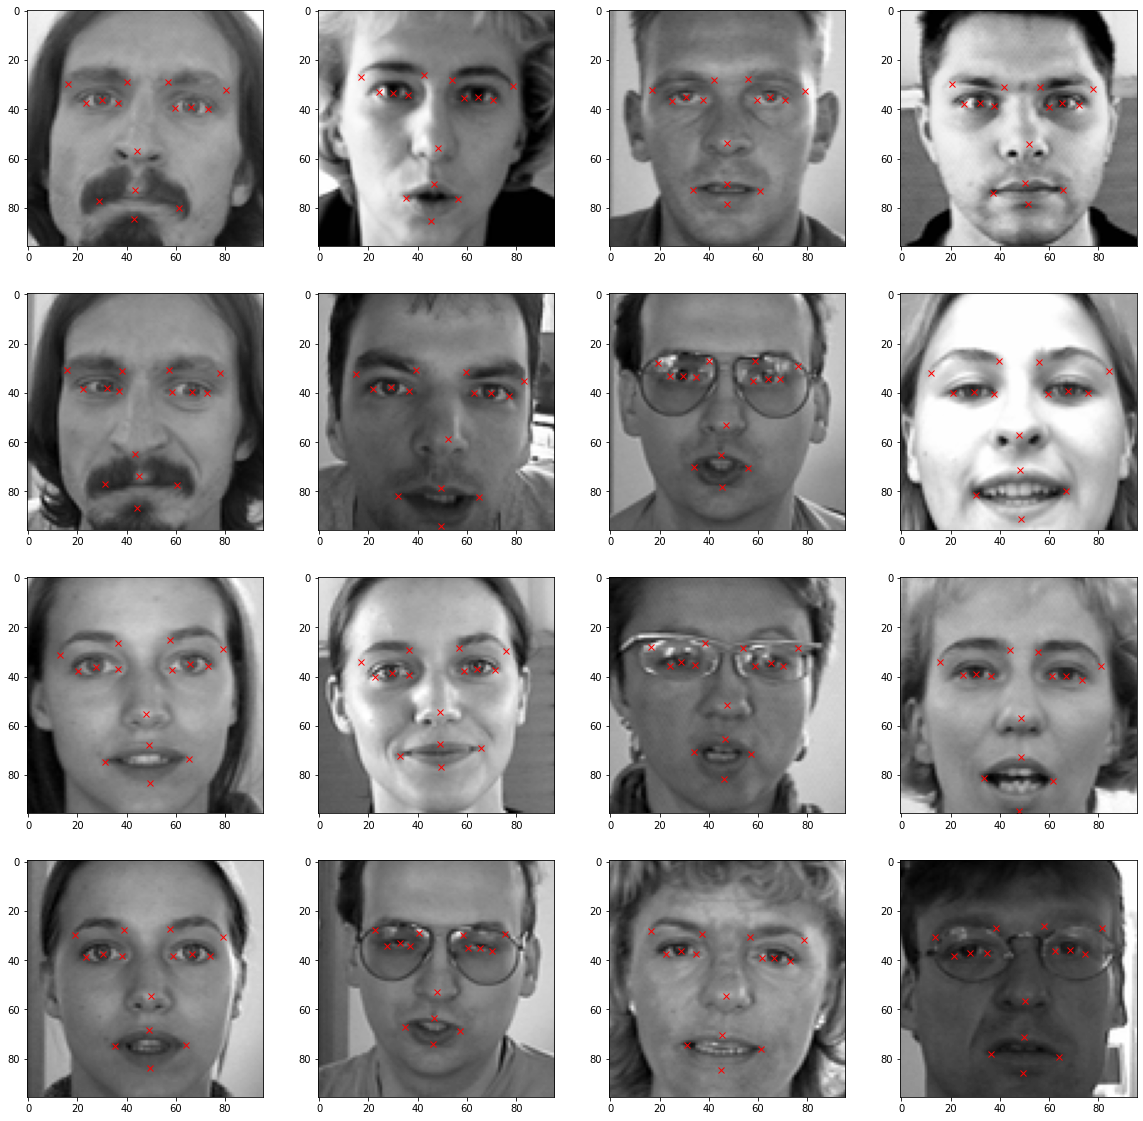

In [ ]:
# Let's view more images in a grid format consisting of 16 images 
fig = plt.figure(figsize=(20, 20))

for i in range(16):
    ax = fig.add_subplot(4, 4, i + 1)#4 rows and 4 cloums     
    image = plt.imshow(keyfacial_df['Image'][i],cmap='gray')
    for j in range(1,31,2):
        plt.plot(keyfacial_df.loc[i][j-1], keyfacial_df.loc[i][j], 'rx')

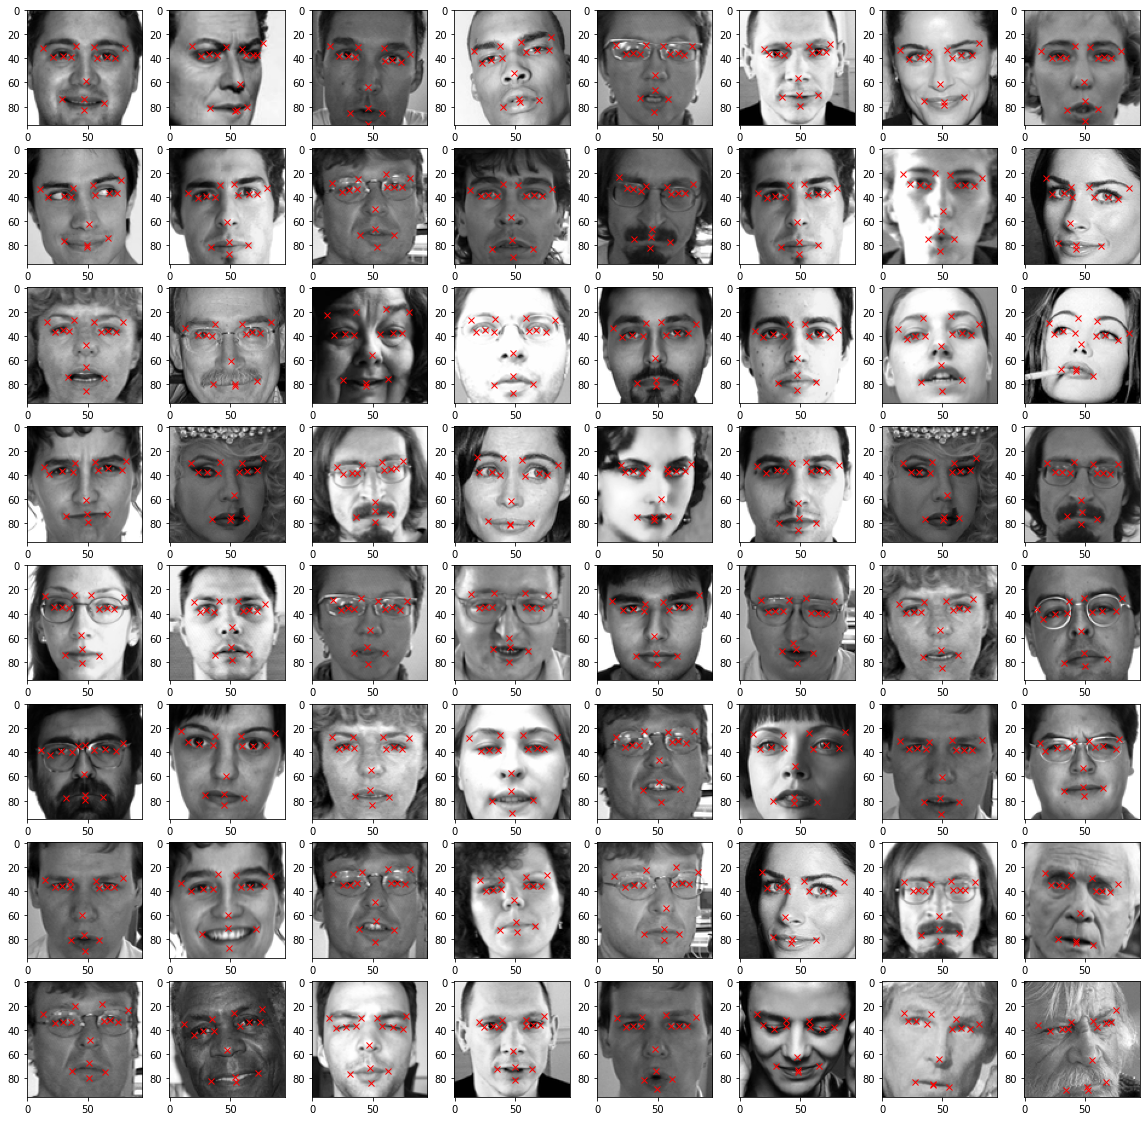

In [ ]:
#performing sanity check by this we mean that checking if all the points on the images are proper or not so we use the random f
import random
fig = plt.figure(figsize=(20, 20))

for i in range(64):
    k = random.randint(1 ,len(keyfacial_df))
    ax = fig.add_subplot(8, 8, i + 1)#4 rows and 4 cloums     
    image = plt.imshow(keyfacial_df['Image'][k],cmap='gray')
    for j in range(1,31,2):
        plt.plot(keyfacial_df.loc[k][j-1], keyfacial_df.loc[k][j], 'rx')

**PERFORMING IMAGE AUGMENTTION **

In [ ]:
#IMPORVING MODEL GENERALIZATION PROPERTY BY TRAINING THE MODEL ON DIFFERENT DATA
#CREATING A NEW COPY OF THE MODEL 
import copy 
keyfacial_df_copy = copy.copy(keyfacial_df)

In [ ]:
#OBTAIN THE THE KEY FACIAL DATA POINTS EXPECT THE LAST COLUMN AS THE LAST COLUMN IS IMAGE SIZE SO LEAVE OUT THE LAST COLUMN 
columns = keyfacial_df_copy.columns[:-1]#leaving out the last column 
columns

Index(['left_eye_center_x', 'left_eye_center_y', 'right_eye_center_x',
       'right_eye_center_y', 'left_eye_inner_corner_x',
       'left_eye_inner_corner_y', 'left_eye_outer_corner_x',
       'left_eye_outer_corner_y', 'right_eye_inner_corner_x',
       'right_eye_inner_corner_y', 'right_eye_outer_corner_x',
       'right_eye_outer_corner_y', 'left_eyebrow_inner_end_x',
       'left_eyebrow_inner_end_y', 'left_eyebrow_outer_end_x',
       'left_eyebrow_outer_end_y', 'right_eyebrow_inner_end_x',
       'right_eyebrow_inner_end_y', 'right_eyebrow_outer_end_x',
       'right_eyebrow_outer_end_y', 'nose_tip_x', 'nose_tip_y',
       'mouth_left_corner_x', 'mouth_left_corner_y', 'mouth_right_corner_x',
       'mouth_right_corner_y', 'mouth_center_top_lip_x',
       'mouth_center_top_lip_y', 'mouth_center_bottom_lip_x',
       'mouth_center_bottom_lip_y'],
      dtype='object')

In [ ]:
#first type of augmentation is horizontal flipping 
#we will flip along the y-axis 
#so the x coordinatess will change 
keyfacial_df_copy['Image'] = keyfacial_df_copy['Image'].apply(lambda x: np.flip(x, axis = 1))

for i in range(len(columns)):
  if i%2 == 0:  # we are doing this because all the x axis funxtions are present in the even numbered column of the data set 
    keyfacial_df_copy[columns[i]] = keyfacial_df_copy[columns[i]].apply(lambda x: 96. - float(x) )
   

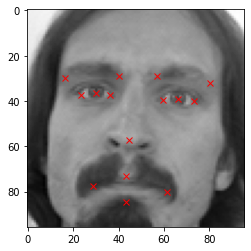

In [ ]:
#printing out the original image 
plt.imshow(keyfacial_df['Image'][0],cmap='gray')
for j in range(1,31,2):
        plt.plot(keyfacial_df.loc[0][j-1], keyfacial_df.loc[0][j], 'rx')

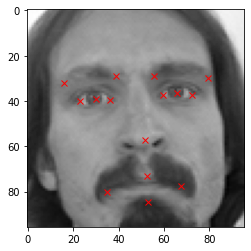

In [ ]:
#printing the flipped image 
plt.imshow(keyfacial_df_copy['Image'][0],cmap='gray')
for j in range(1,31,2):
        plt.plot(keyfacial_df_copy.loc[0][j-1], keyfacial_df_copy.loc[0][j], 'rx')

MORE THE AUGMENTION PERFORMED MORE THE DATA THAT WE GET 

In [ ]:
augmented_df = np.concatenate((keyfacial_df,keyfacial_df_copy))#combining both the flipped and the regular images into one common data set 

In [ ]:
augmented_df.shape#checking the total images in the data set cause including both horizontal and original image 

(4280, 31)

In [ ]:
#Randomingly increasing the brightness
#We multiply pixel values by random values between 1 and 2 to increase the brightness of the image
#we clip the value between 0 and 255

import random

keyfacial_df_copy = copy.copy(keyfacial_df)
keyfacial_df_copy['Image'] = keyfacial_df['Image'].apply(lambda x:np.clip(random.uniform(1, 2)* x,0.0, 255.0))#increasing the brightness of the image by follwing the above steps 
augmented_df = np.concatenate((augmented_df,keyfacial_df_copy))
augmented_df.shape

(6420, 31)

KEY FACIAL POINTS CHANGE WHEN WE FLIP THE IMAGES 

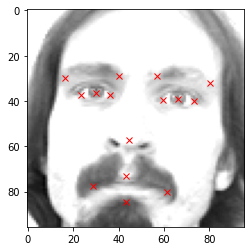

In [ ]:
# Image with increased brightness

plt.imshow(keyfacial_df_copy['Image'][0],cmap='gray')
for j in range(1,31,2):
        plt.plot(keyfacial_df_copy.loc[0][j-1], keyfacial_df_copy.loc[0][j], 'rx')

In [ ]:
#vertical flipping in this like the previous type of flipping flip just change the axis to 0 and the if statemnet as given 
keyfacial_df_copy = copy.copy(keyfacial_df)
keyfacial_df_copy['Image'] = keyfacial_df_copy['Image'].apply(lambda x: np.flip(x, axis = 0))

for i in range(len(columns)):
  if i%1 == 0:  # we are doing this because all the y axis funxtions are present in the odd numbered column of the data set 
    keyfacial_df_copy[columns[i]] = keyfacial_df_copy[columns[i]].apply(lambda x: 96. - float(x) )


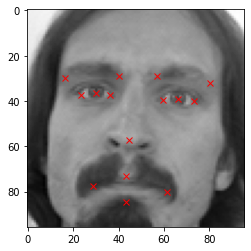

In [ ]:
#original image 
plt.imshow(keyfacial_df['Image'][0],cmap='gray')
for j in range(1,31,2):
        plt.plot(keyfacial_df.loc[0][j-1], keyfacial_df.loc[0][j], 'rx')

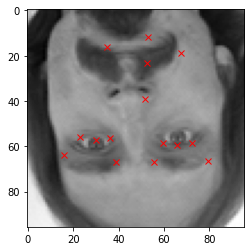

In [ ]:
#flipped image along the y axis 
plt.imshow(keyfacial_df_copy['Image'][0],cmap='gray')
for j in range(1,31,2):
        plt.plot(keyfacial_df_copy.loc[0][j-1], keyfacial_df_copy.loc[0][j], 'rx')

In [ ]:
#normalization of image
#obtain the value of images which is present in the last column 
#we are taking only the last column becase the last column consists the image size
img = augmented_df[:, 30] #considering all the rows but only the last column 

#normalization of image 
img = img/255

X = np.empty((len(img), 96,96,1))#this is to create a arrary which will store the images 

for i in range(len(img)):
  X[i,] = np.expand_dims(img[i], axis=2)

#convert images into float32 format 
X = np.asarray(X).astype(np.float32)
X.shape 


(6420, 96, 96, 1)

In [ ]:
y = augmented_df[:, :30]#considering all the rows and colums 
y = np.asarray(y).astype(np.float32)
y.shape

(6420, 30)

In [ ]:
#split the data set into training data and test data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)#training data is 90% and test data is 10%


BUILDING DEEP RESIDUAL NETWORKS FOR DETECTING KEY FACIAL POINTS 

In [ ]:
def res_block(X, filter, stage):
  #Convolutional_block

  X_copy = X

  f1 , f2, f3 = filter
  #Main Path
  X = Conv2D(f1, (1,1),strides = (1,1), name ='res_'+str(stage)+'_conv_a', kernel_initializer= glorot_uniform(seed = 0))(X)
 # X = MaxPool2D((2,2))(X) removing this layer gives us more number of parameters
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_a')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_conv_b', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_b')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_conv_c', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_c')(X)


  #Short path

  X_copy = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_conv_copy', kernel_initializer= glorot_uniform(seed = 0))(X_copy)
  #X_copy = MaxPool2D((2,2))(X_copy)
  X_copy = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_copy')(X_copy)

  #ADD

  X = Add()([X,X_copy])
  X = Activation('relu')(X)

  #Identity Block 1

  X_copy = X


  #Main Path
  X = Conv2D(f1, (1,1),strides = (1,1), name ='res_'+str(stage)+'_identity_1_a', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_a')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_identity_1_b', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_b')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_identity_1_c', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_c')(X)

  #ADD

  X = Add()([X,X_copy])
  X = Activation('relu')(X)

  #Identity Block 2

  X_copy = X


  #Main Path
  X = Conv2D(f1, (1,1),strides = (1,1), name ='res_'+str(stage)+'_identity_2_a', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_a')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_identity_2_b', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_b')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_identity_2_c', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_c')(X)

  #ADD

  X = Add()([X,X_copy])
  X = Activation('relu')(X)

  return X


In [ ]:
input_shape = (96,96,1)

#Input tensor shape
X_input = Input(input_shape)

#Zero-padding

X = ZeroPadding2D((3,3))(X_input)

# 1 - stage

X = Conv2D(64, (7,7), strides= (2,2), name = 'conv1', kernel_initializer= glorot_uniform(seed = 0))(X)
X = BatchNormalization(axis =3, name = 'bn_conv1')(X)
X = Activation('relu')(X)
X = MaxPooling2D((3,3), strides= (2,2))(X)

# 2- stage

X = res_block(X, filter= [64,64,256], stage= 2)

# 3- stage

X = res_block(X, filter= [128,128,512], stage= 3)

# 4-stage

X = res_block(X, filter= [256,256,1024], stage= 4)


#Average Pooling

X = AveragePooling2D((2,2), name = 'Averagea_Pooling')(X)

#Final layer

X = Flatten()(X)
X = Dense(4096, activation = 'relu')(X)
X = Dropout(0.2)(X)
X = Dense(2048, activation = 'relu')(X)
X = Dropout(0.1)(X)#regularization technique 
X = Dense(30, activation = 'relu')(X)


model_1 = Model( inputs= X_input, outputs = X)
model_1.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 96, 96, 1)]  0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 102, 102, 1)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 48, 48, 64)   3200        zero_padding2d[0][0]             
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 48, 48, 64)   256         conv1[0][0]                      
_______________________________________________________________________________________

In [ ]:
adam = tf.keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, amsgrad=False)
model_1.compile(loss="mean_squared_error",optimizer= adam , metrics = ['accuracy'])

In [ ]:
#save the best model with lower validation loss
checkpointer = ModelCheckpoint(filepath="weights_keypoint.hdf5", verbose=1, save_best_only=True)

In [ ]:
history = model_1.fit(X_train, y_train, batch_size = 32, epochs= 500, validation_split = 0.05, callbacks=[checkpointer])

Epoch 1/500
172/172 [==============================] - ETA: 0s - loss: 210.4532 - accuracy: 0.4474
Epoch 00001: val_loss improved from inf to 367.02747, saving model to weights_keypoint.hdf5
172/172 [==============================] - 178s 1s/step - loss: 210.4532 - accuracy: 0.4474 - val_loss: 367.0275 - val_accuracy: 0.6955
Epoch 2/500
172/172 [==============================] - ETA: 0s - loss: 101.0881 - accuracy: 0.5090
Epoch 00002: val_loss improved from 367.02747 to 310.74063, saving model to weights_keypoint.hdf5
172/172 [==============================] - 175s 1s/step - loss: 101.0881 - accuracy: 0.5090 - val_loss: 310.7406 - val_accuracy: 0.6886
Epoch 3/500
172/172 [==============================] - ETA: 0s - loss: 72.7237 - accuracy: 0.5287
Epoch 00003: val_loss improved from 310.74063 to 124.07314, saving model to weights_keypoint.hdf5
172/172 [==============================] - 177s 1s/step - loss: 72.7237 - accuracy: 0.5287 - val_loss: 124.0731 - val_accuracy: 0.6713
Epoch 4/5

In [ ]:
#saving the model architecture to json file for future use

model_json = model_1.to_json()
with open("detection.json","w") as json_file:
  json_file.write(model_json)


In [ ]:
#Evaluating the model

result = model.evaluate(X_test,y_test)
print("Accuracy : {}".format(result[1]))

In [ ]:
#getting the model keys 
history.history.keys()

In [ ]:
#plotting the training artifacts

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss','val_loss'], loc = 'upper right')
plt.show()